# COVID-19 Development in Hamburg, Germany

In [1]:
using Hamburg

In [27]:
using Dates, Gadfly, DataFrames, TimeSeries, StatsPlots
Gadfly.set_default_plot_size(700px, 300px)

infected = dataset("covid-19", "infected")
DataFrames.head(infected, 5)

,deaths,hospitalizations,intensivecare,new,recordedat,recovered,total
,Int64?,Int64?,Int64?,Int64,Date,Int64?,Int64
1,241,60,12,77,2020-10-12,7200,9040
2,241,60,12,52,2020-10-11,7100,8963
3,241,60,12,98,2020-10-10,7000,8911
4,241,60,12,145,2020-10-09,7000,8813
5,241,59,12,125,2020-10-08,6900,8668


## New cases

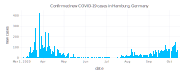

In [3]:
plot(infected,
    y=:new, 
    x=:recordedat, 
    Geom.bar, 
    Coord.cartesian(xmin=Date(2020, 3,1), ymin=0), 
    Guide.title("Confirmed new COVID-19 cases in Hamburg, Germany"), 
    Guide.xlabel("date"), 
    Guide.ylabel("new cases"))

The senate will need to decide on limiting measures if there are 900 or more cases in the last seven days.

Sum of new cases in the last seven days:

In [4]:
lastweek = sum(infected[1:7, :].new)

702

## Hospitalizations (total)

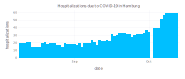

In [5]:
plot(dropmissing(infected), 
    y=:hospitalizations, 
    x=:recordedat, 
    Geom.bar, 
    Coord.cartesian(xmin=Date(2020, 8,10)), 
    Guide.title("Hospitalizations due to COVID-19 in Hamburg"), 
    Guide.xlabel("date"), 
    Guide.ylabel("hospitalizations"))

## Development in the boroughs

In [6]:
boroughsovertime = dataset("covid-19", "boroughs")
boroughs = select(boroughsovertime, Not(:recordedat))
boroughsmatrix = convert(Matrix, boroughs)
DataFrames.rename!(boroughs, "Hamburg Mitte" => "Mitte")
boroughsovertime

,Altona,Bergedorf,Eimsbüttel,Hamburg Mitte,Hamburg Nord,Harburg,Wandsbek,recordedat
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Date
1,63,39,58,94,109,70,156,2020-10-05
2,69,28,65,97,92,46,123,2020-09-28
3,79,31,83,98,143,43,181,2020-09-21
4,88,23,72,87,126,41,105,2020-09-14
5,79,17,59,88,90,21,73,2020-09-07
6,47,17,43,86,58,22,74,2020-08-31
7,49,15,38,111,36,39,67,2020-08-24
8,64,11,48,150,43,54,83,2020-08-17
9,41,17,26,95,46,48,84,2020-08-10


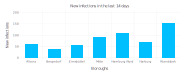

In [7]:
plot(x=names(boroughs), 
    y=boroughsmatrix[1, :], 
    Geom.bar, 
    Theme(bar_spacing=10mm), 
    Guide.xlabel("Boroughs"), 
    Guide.ylabel("New infections"),
    Guide.title("New infections in the last 14 days"))

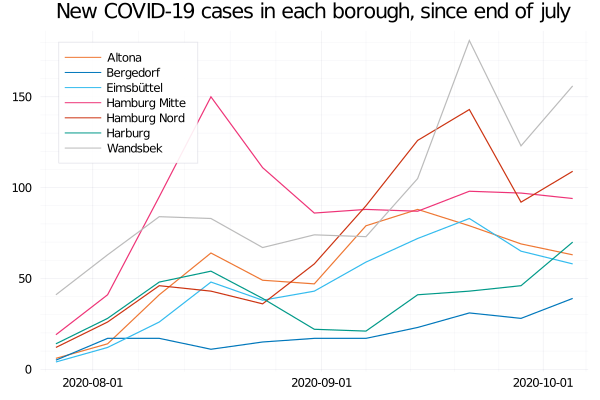

In [13]:
tb = TimeArray(boroughsovertime, timestamp=:recordedat)

using Plots
Plots.theme(:vibrant)
Plots.plot(tb, legend=:topleft)
Plots.plot!(title="New COVID-19 cases in each borough, since end of july")